In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pic_path = "C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env//pictures/lena.png"

### Bilateral Edge Preserving Technique

In [5]:
import cv2
import numpy as np

# Load an image
image = cv2.imread(pic_path)

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Display the result
cv2.imshow('Original Image', image)
cv2.imshow('Bilateral Filtered Image', bilateral_filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows() 

### Visualization of the Code Above

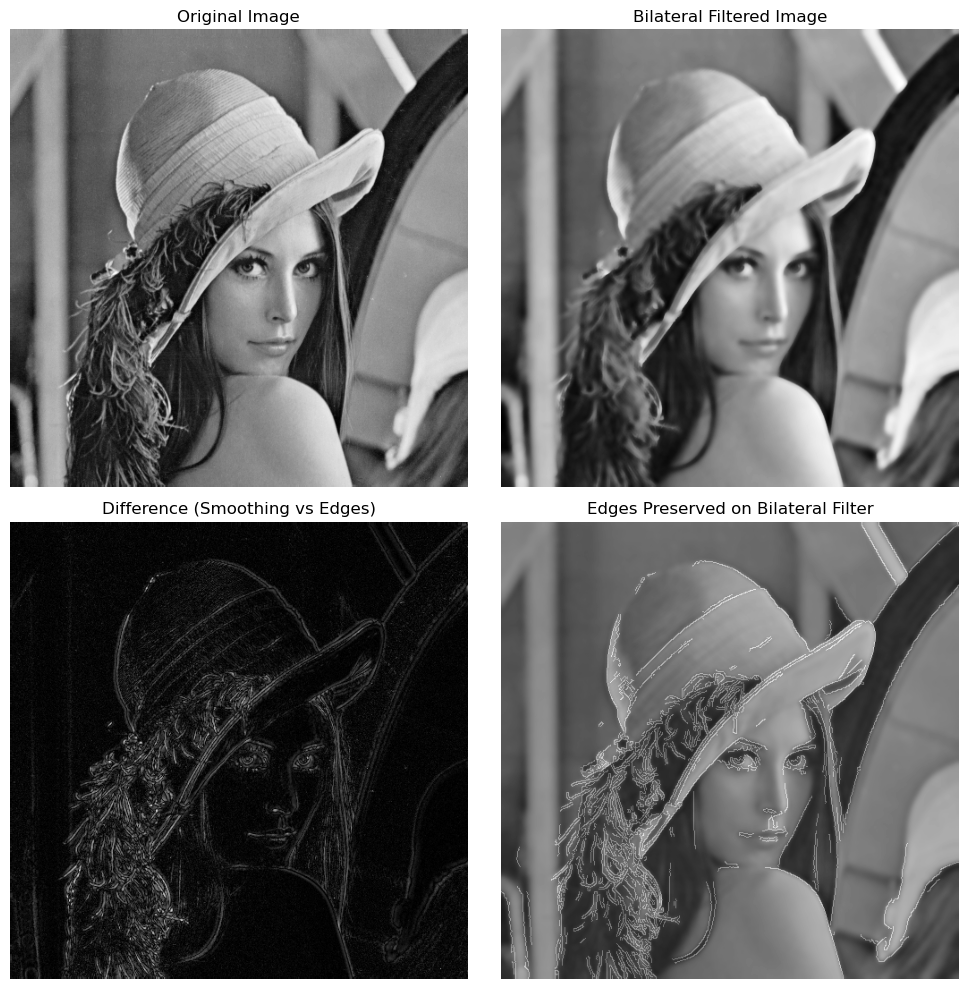

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread(pic_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for simplicity

# Step 1: Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Step 2: Apply edge detection (Canny Edge Detection)
edges = cv2.Canny(image, 100, 200)  # Original image edges
filtered_edges = cv2.Canny(bilateral_filtered_image, 100, 200)  # Bilateral filter applied image edges

# Step 3: Show the difference between original and filtered image (to see smoothing effect)
difference = cv2.absdiff(image, bilateral_filtered_image)

# Step 4: Visualize the results
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference (Smoothing vs Edges)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray', alpha=0.7)
plt.imshow(bilateral_filtered_image, cmap='gray', alpha=0.6)  # Overlay edges on filtered image
plt.title('Edges Preserved on Bilateral Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

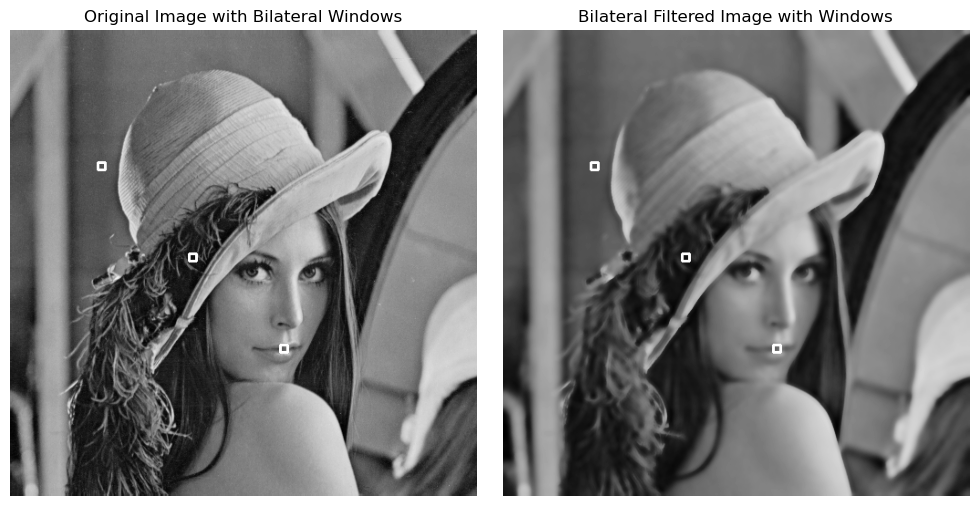

In [9]:

# Function to draw bounding boxes around the bilateral filter window
def draw_bilateral_windows(image, points, d):
    # Create a copy of the image to draw on
    image_copy = image.copy()
    
    # Draw a bounding box around each point of interest
    for (x, y) in points:
        # Calculate the top-left and bottom-right points for the d x d window
        top_left = (x - d//2, y - d//2)
        bottom_right = (x + d//2, y + d//2)
        
        # Draw the bounding box in red
        cv2.rectangle(image_copy, top_left, bottom_right, (255, 0, 0), 2)
    
    return image_copy

# Load the image
image = cv2.imread(pic_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter
d = 9  # Diameter of the window
sigmaColor = 75
sigmaSpace = 75
bilateral_filtered_image = cv2.bilateralFilter(image_gray, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)

# Select points of interest manually (e.g., edge points and smooth areas)
points_of_interest = [(100, 150), (200, 250), (300, 350)]  # You can adjust these based on the image

# Draw bounding boxes around the bilateral filter windows
original_with_windows = draw_bilateral_windows(image_gray, points_of_interest, d)
filtered_with_windows = draw_bilateral_windows(bilateral_filtered_image, points_of_interest, d)

# Plot the original and filtered images with bounding boxes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_with_windows, cmap='gray')
plt.title('Original Image with Bilateral Windows')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_with_windows, cmap='gray')
plt.title('Bilateral Filtered Image with Windows')
plt.axis('off')

plt.tight_layout()
plt.show()

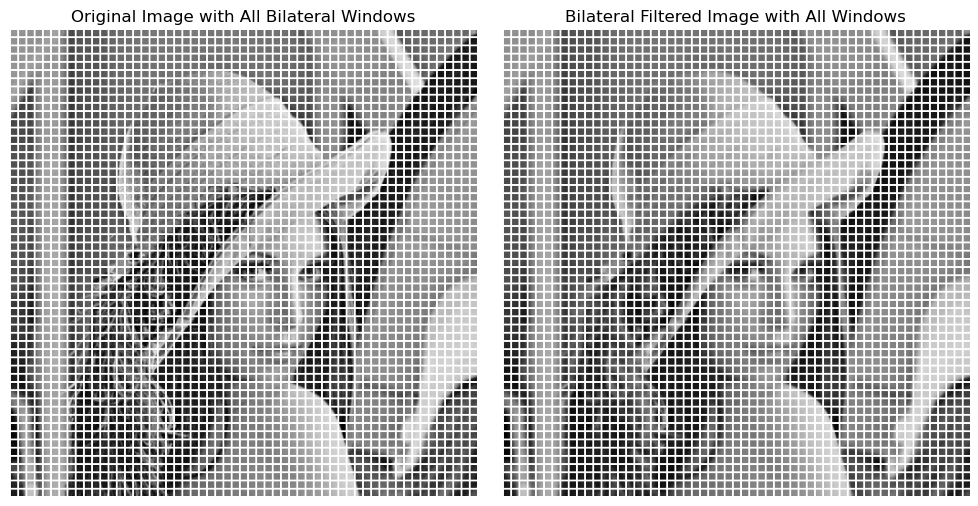

In [16]:

# Function to draw bounding boxes for all pixels
def draw_all_bilateral_windows(image, d):
    # Create a copy of the image to draw on
    image_copy = image.copy()

    # Calculate the step size to avoid drawing overlapping boxes for every pixel (can be adjusted for visualization)
    step_size = d  # Step size is equal to the diameter of the bilateral filter window

    # Loop through the image with the step size
    for y in range(d//2, image.shape[0], step_size):
        for x in range(d//2, image.shape[1], step_size):
            # Calculate the top-left and bottom-right points for the d x d window
            top_left = (x - d//2, y - d//2)
            bottom_right = (x + d//2, y + d//2)
            
            # Draw the bounding box in red (255, 0, 0) with thickness of 1 pixel
            cv2.rectangle(image_copy, top_left, bottom_right, (255, 0, 0), 1)
    
    return image_copy

# Load the image and convert to grayscale
image = cv2.imread(pic_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter
d = 9  # Diameter of the window
sigmaColor = 75
sigmaSpace = 75
bilateral_filtered_image = cv2.bilateralFilter(image_gray, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)

# Draw bounding boxes for all bilateral filter windows on the original and filtered images
original_with_windows = draw_all_bilateral_windows(image_gray, d)
filtered_with_windows = draw_all_bilateral_windows(bilateral_filtered_image, d)

# Plot the original and filtered images with bounding boxes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_with_windows, cmap='gray')
plt.title('Original Image with All Bilateral Windows')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_with_windows, cmap='gray')
plt.title('Bilateral Filtered Image with All Windows')
plt.axis('off')

plt.tight_layout()
plt.show()